In [2]:
import pandas as pd
import numpy as np

import csv, pickle, glob

from datetime import datetime

#import dill as pickle

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import matplotlib.collections as mcoll
import matplotlib.path as mpath
from matplotlib import rc

# #rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Computer Modern']})
rc('text', usetex = True)

In [3]:
# Update Paths
path_to_vatic_outputs = r'/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/'
path_to_images        = r'/Users/Guille/Dropbox/ProcessedDataTexas/images/'

/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-07-22


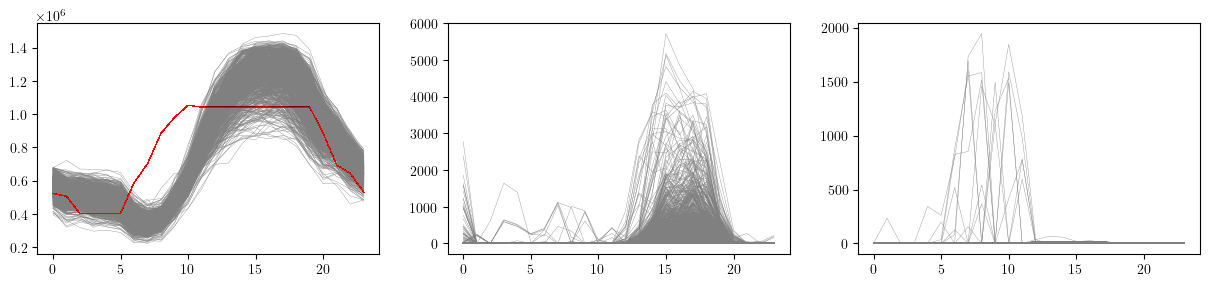

36
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-10-04


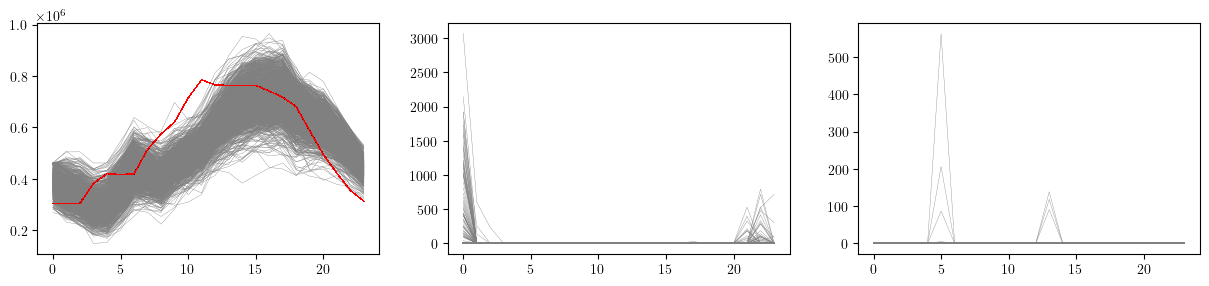

4
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-08-08


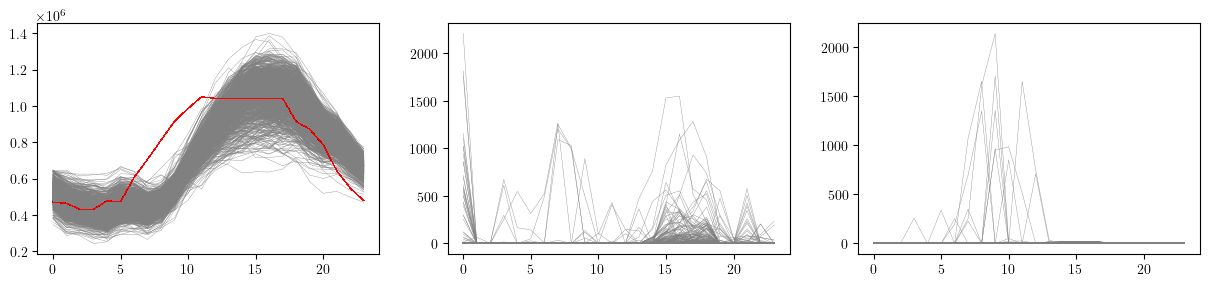

15
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-07-24


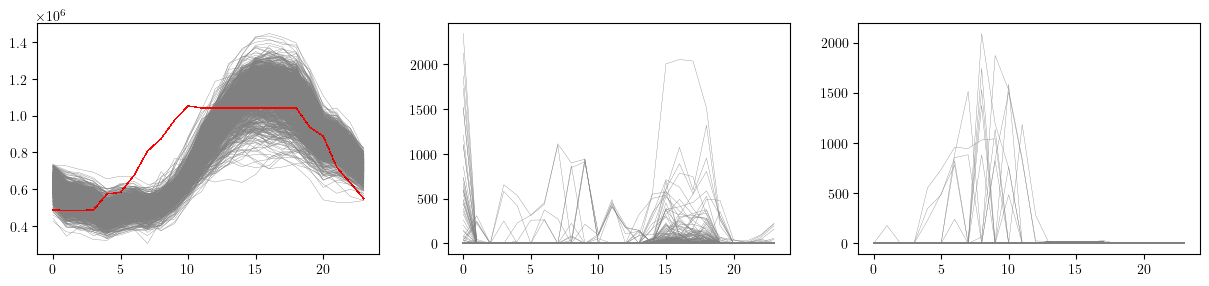

17
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-03-14


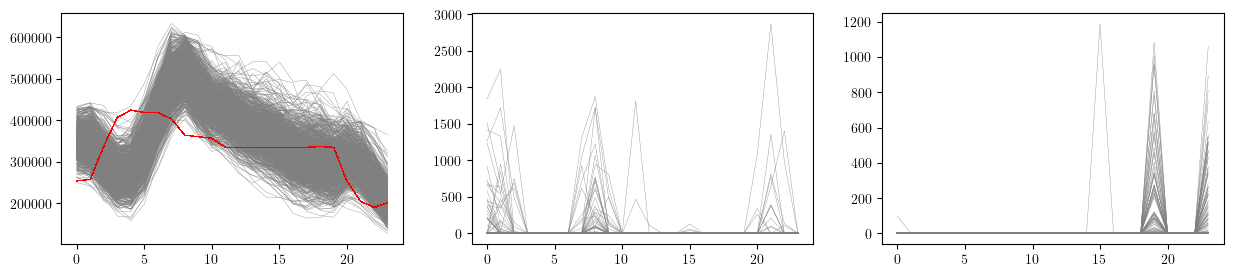

87
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-02-13


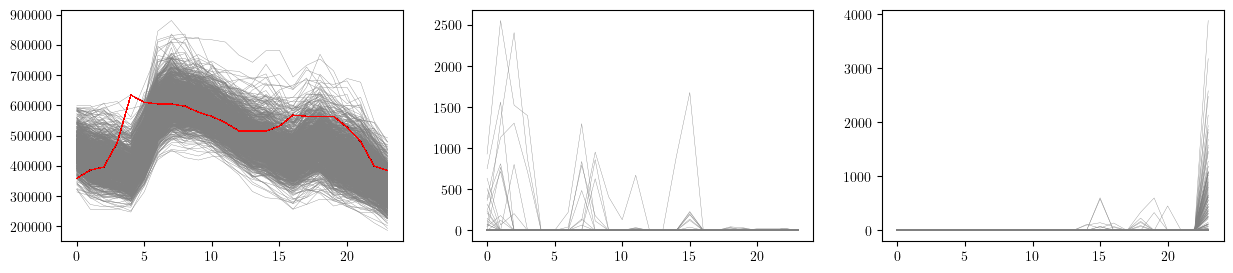

95
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-02-14


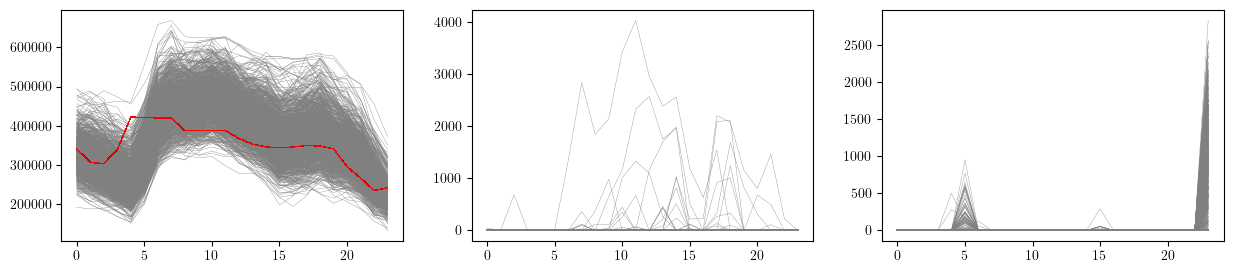

771
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-01-02


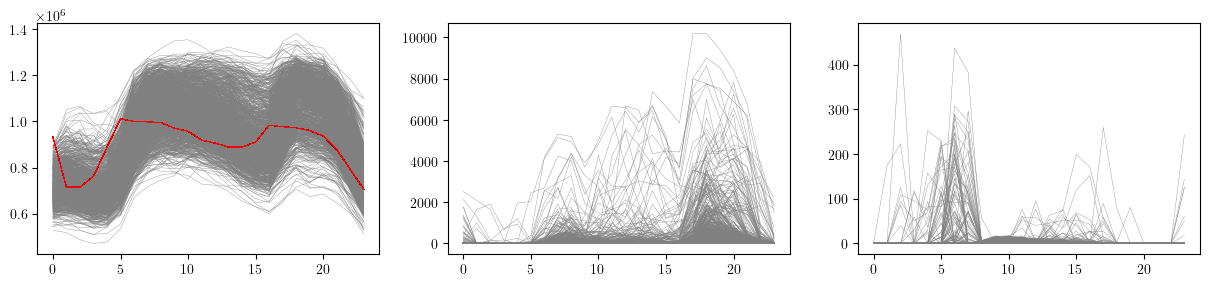

68
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-11-02


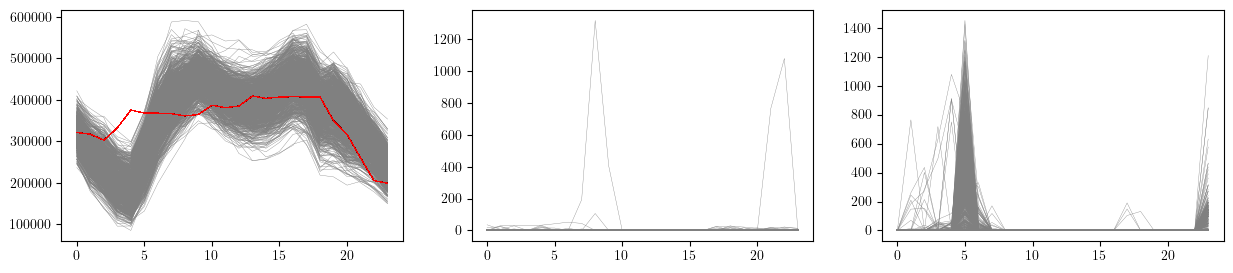

601
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-12-01


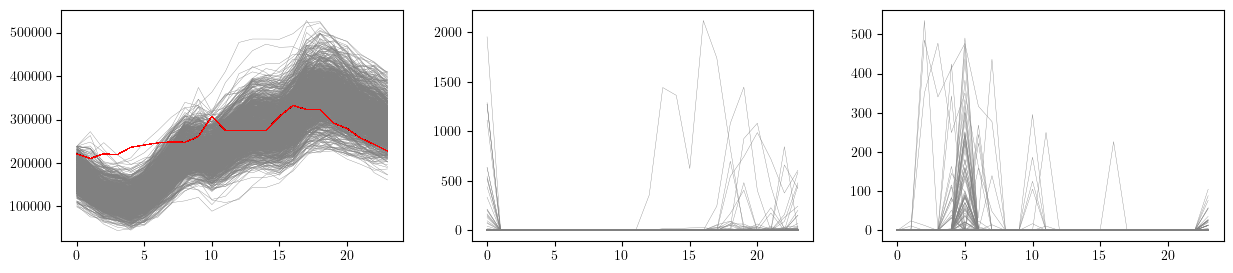

49
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-05-27


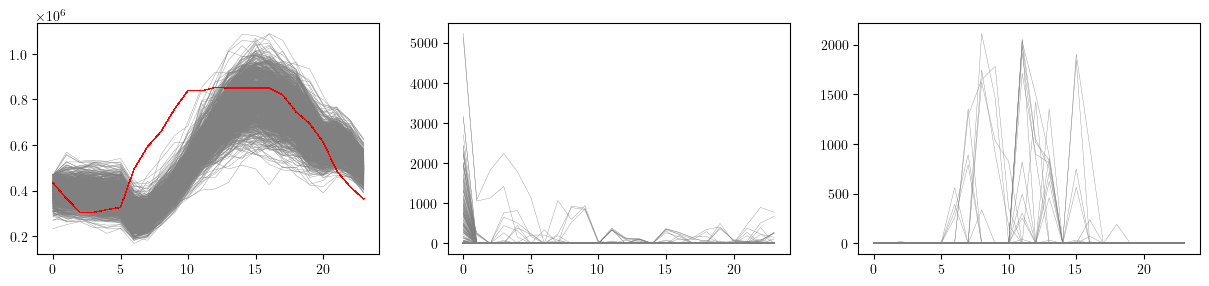

29
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-09-14


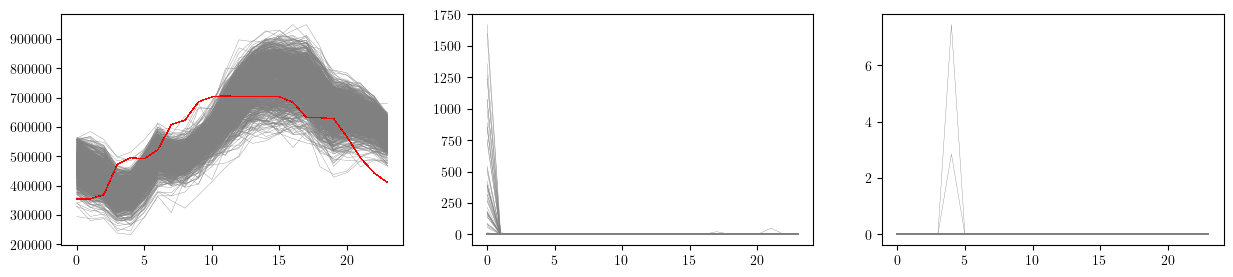

0
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-05-10


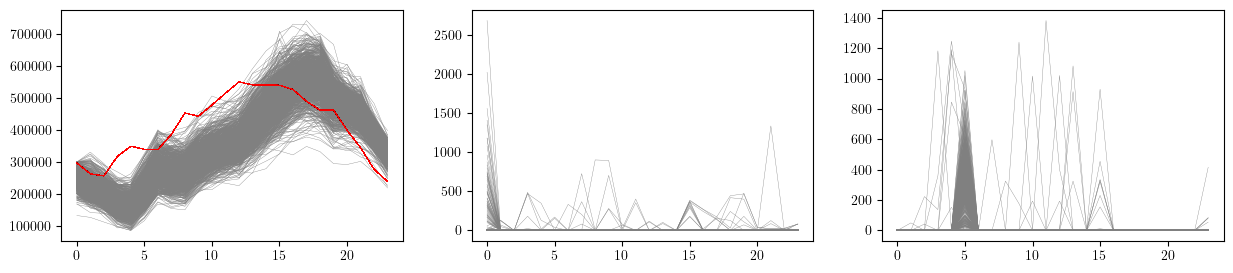

289
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-01-20


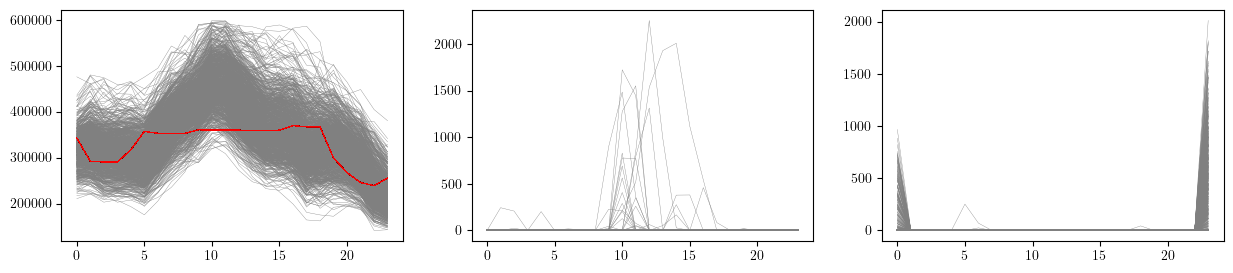

518
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-06-30


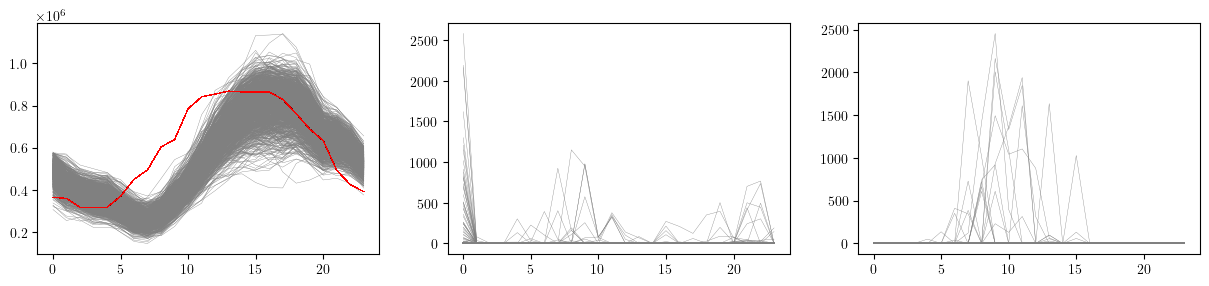

19
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-10-17


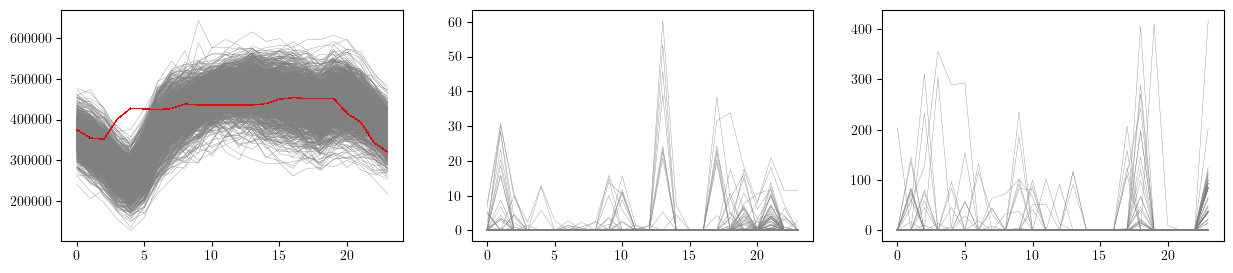

39
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-04-01


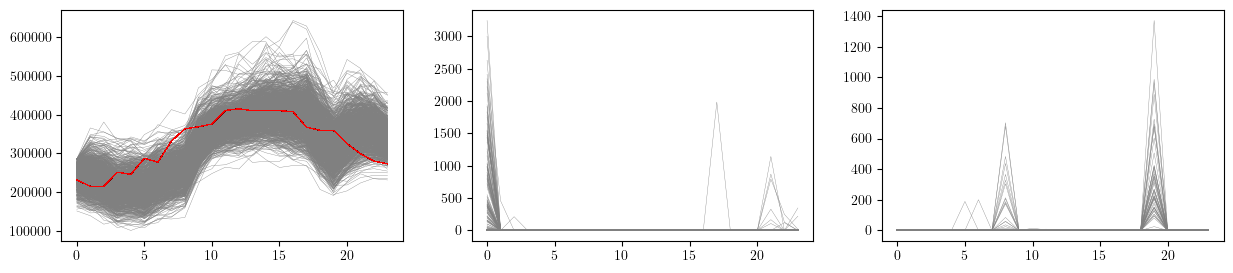

61
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-04-09


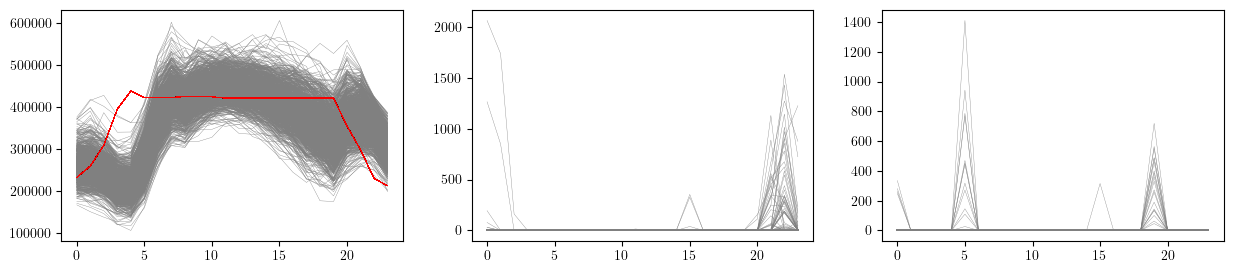

33
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-09-04


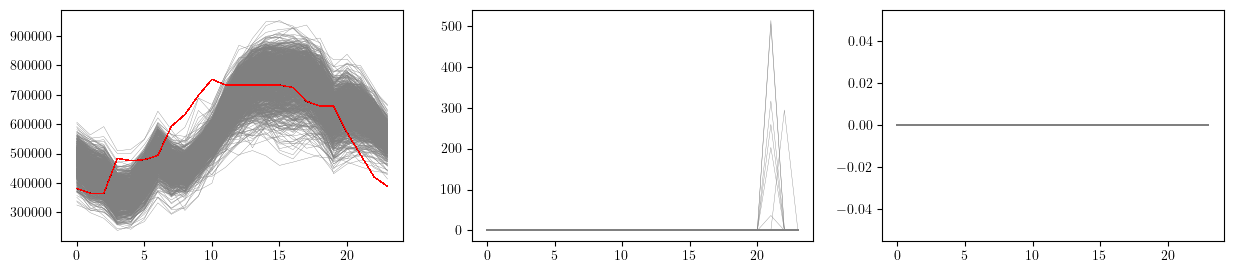

0
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-02-26


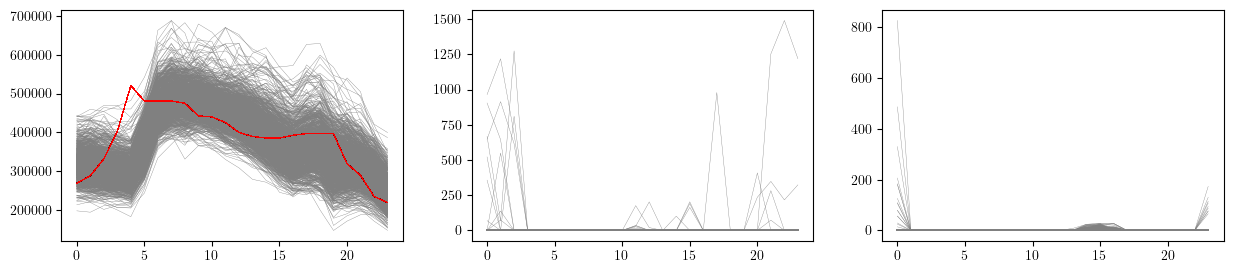

13
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-12-27


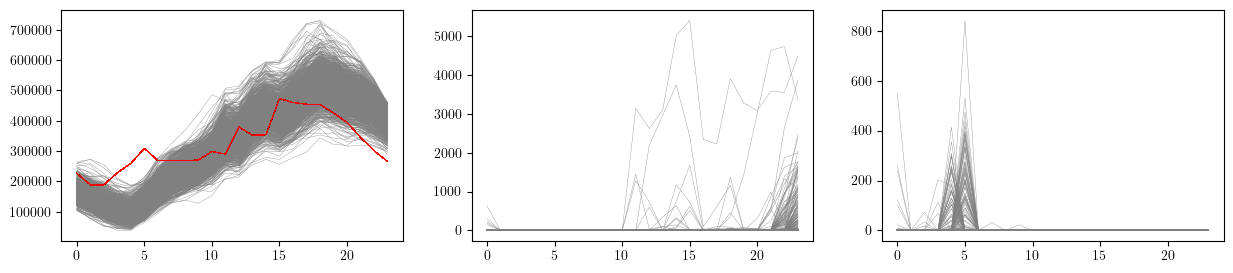

82
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-06-04


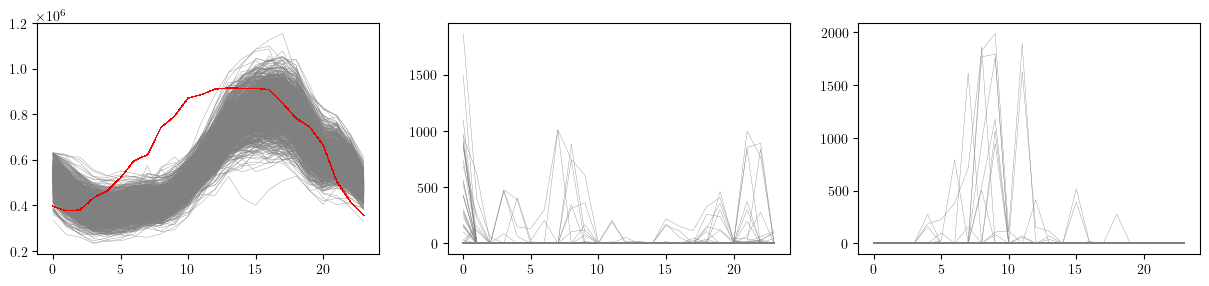

17
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-11-13


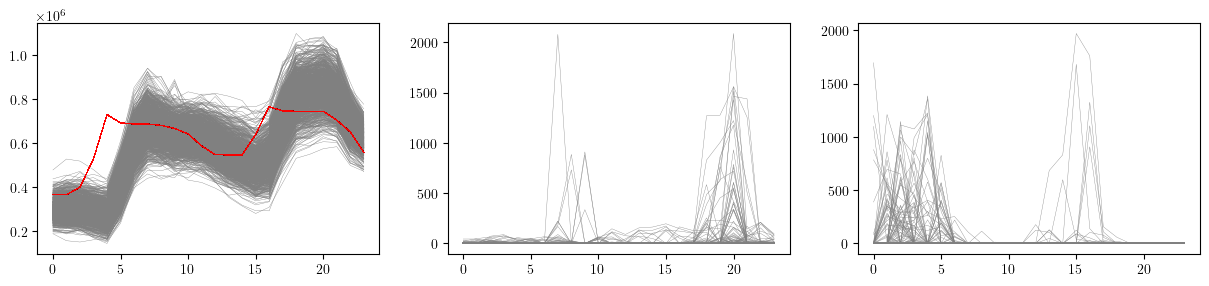

77
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-04-24


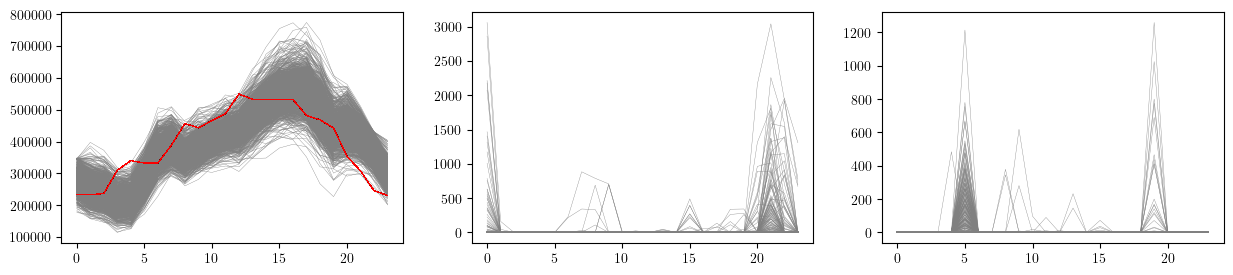

118
/Users/Guille/Dropbox/ProcessedDataTexas/vatic_output/Texas-7k/VaticReportTexas/2018-08-18


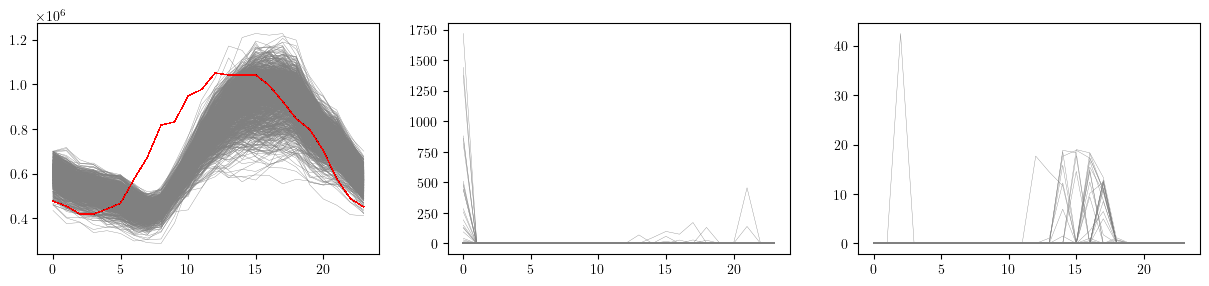

0
(24, 25) (24, 25)
(24, 25) (24, 25)
(25,)
[ 7 10  8  7  3  2  2  1 11 12  5  9  5  1  6 10  4  4  9  2 12  6 11  4
  8]


In [16]:
def _plot(summary_, date):
    
    # Reliability Metrics
    # LOLP = np.sum(summary_[:, 2, :] > 0.)/(24*summary_.shape[-1])
    # LOLH = (365*24)*np.sum(summary_[:, 2, :] > 0.)/(24*summary_.shape[-1])
    # EUE  = 100*summary_[:, 2, :].sum()/summary_[:, 9, :].sum()
    # print(np.sum(summary_[:, 2, :] > 0., axis = -1))
    # print(np.sum(np.sum(summary_[:, 2, :] > 0., axis = 0) > 0.))
    plt.figure(figsize = (15, 3))
    #plt.suptitle(date + ' LOLP = {} [Prob.]'.format(LOLP) + ' LOLH = {} [hours]'.format(LOLH) + ' EUE = {} [%]'.format(EUE), fontsize = 10)
    plt.subplot(131)
    #plt.title('Fx. & Vr. Costs', fontsize = 8)
    plt.plot(summary_[:, 1, :], color = 'gray', lw = .25)
    plt.plot(summary_[:, 0, :], color = 'r', lw = .25)
    #plt.ylim(0, 7000)
    plt.subplot(132)
    # plt.title('Load Shedding', fontsize = 8)
    plt.plot(summary_[:, 2, :], color = 'gray', lw = .25)
    # #plt.ylim(0, 7000)
    plt.subplot(133)
    # plt.title('VRE Curtailment', fontsize = 8)
    plt.plot(summary_[:, 8, :], color = 'gray', lw = .25)
    #plt.ylim(0, 5000)
    #plt.savefig(path_to_images + '{}.pdf'.format(date), dpi = 300, bbox_inches = 'tight')
    plt.show()

def _load(path):
    summary_ = []
    for file in glob.glob(path + r'/*'):
        summary_.append(pd.read_pickle(file).to_numpy()[..., np.newaxis])
    return np.concatenate(summary_, axis = 2)


all_mean_load_shed_   = []
all_prob_load_shed_   = []
all_mean_vre_curtail_ = []
all_prob_vre_curtail_ = []
month_                = []

for file_ in glob.glob(path_to_vatic_outputs + 'VaticReportTexas/*'):
    print(file_)
    
    summary_ = _load(file_)
    
    _plot(summary_, date = file_[-10:])
    
    idx_ = np.sum(summary_[:, 8, :], axis = 0) > 100
    print(idx_.sum())
    all_mean_load_shed_.append(np.mean(summary_[:, 2, :], axis = -1))
    all_prob_load_shed_.append(np.sum(summary_[:, 2, :] > 0., axis = -1))
    all_mean_vre_curtail_.append(np.mean(summary_[:, 8, :], axis = -1))
    all_prob_vre_curtail_.append(np.sum(summary_[:, 8, :] > 0., axis = -1))
    
    month_.append(int(file_[-5:-3]))
    
    
all_mean_load_shed_ = np.stack(all_mean_load_shed_).T
all_prob_load_shed_ = np.stack(all_prob_load_shed_).T
print(all_mean_load_shed_.shape, all_prob_load_shed_.shape)

all_mean_vre_curtail_ = np.stack(all_mean_vre_curtail_).T
all_prob_vre_curtail_ = np.stack(all_prob_vre_curtail_).T
print(all_mean_vre_curtail_.shape, all_prob_vre_curtail_.shape)

month_ = np.array(month_)
print(month_.shape)

print(month_)

(24,) (24, 25)


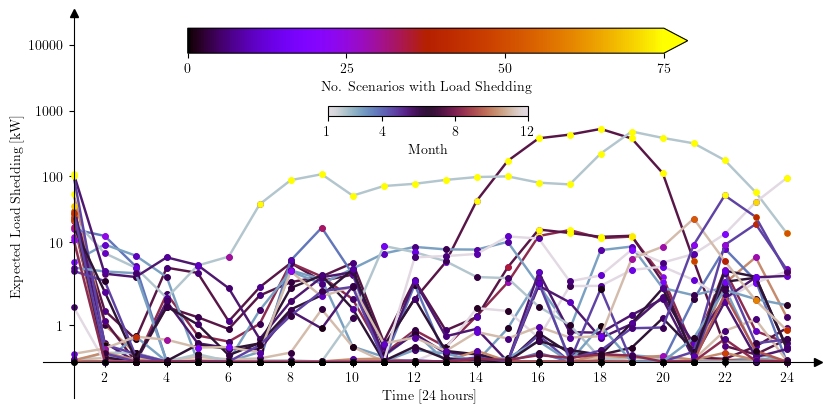

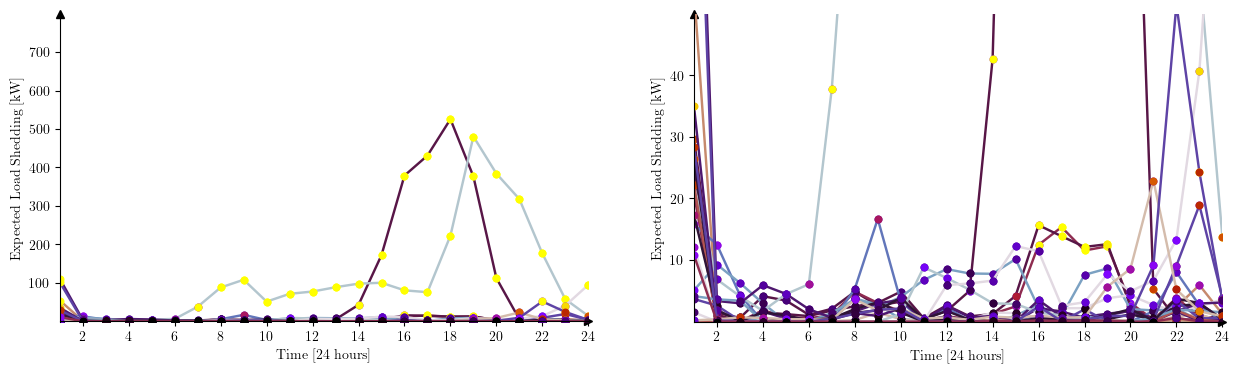

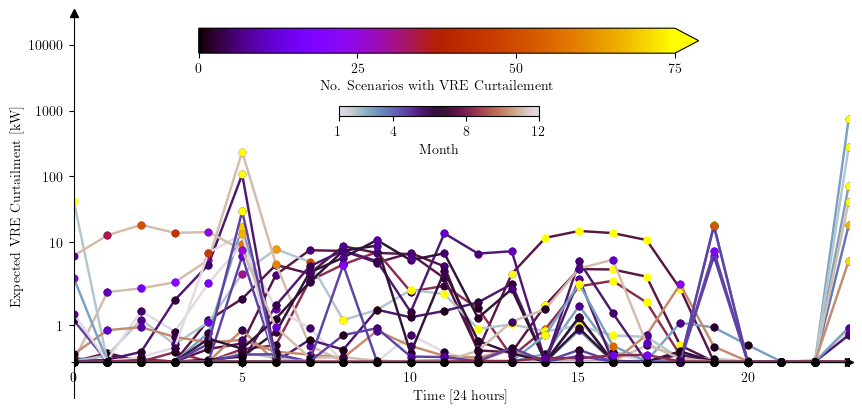

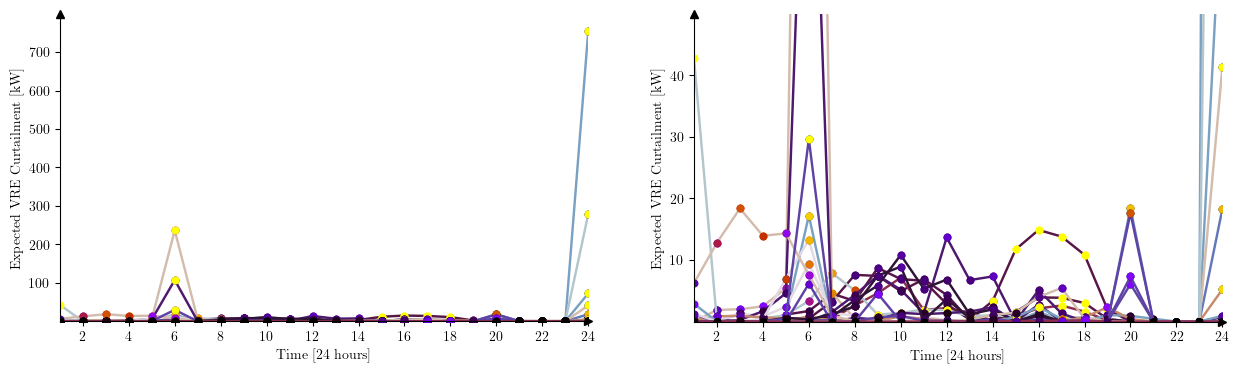

In [15]:
# Load Shedding Stats graph
def _plot_load_shed_stats(all_mean_load_shed_, all_prob_load_shed_, month_, vmin = .075):
    all_prob_load_shed_p_ = all_prob_load_shed_/vmin
    x_ = np.arange(0, all_prob_load_shed_.shape[0], 1)
    y_ = all_mean_load_shed_ + 1e-25
    print(x_.shape, y_.shape)

    #plt.style.use('default')
    
    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111) 
    
    cmap1 = mpl.colormaps['gnuplot']
    cmap2 = mpl.colormaps['twilight']
    
    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax1.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax1.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax1.plot(1, 0, ">k", transform = ax1.get_yaxis_transform(), 
                         clip_on   = False)
    ax1.plot(0, 1, "^k", transform = ax1.get_xaxis_transform(), 
                         clip_on   = False)

    for j in range(all_mean_load_shed_.shape[1]):

        list_ = [cmap1(all_prob_load_shed_p_[i, j]) for i in range(all_mean_load_shed_.shape[0])]
        ax1.set_prop_cycle('color', list_)

        ax1.plot(x_, y_[:, j], linewidth  = 1.75, 
                               color      = cmap2(month_[j]/12.),
                               marker     = '', 
                               markersize = 2.5, 
                               linestyle  = '-')
        
        for i in range(all_mean_vre_curtail_.shape[0]):
            ax1.plot(x_[i:i + 2], y_[i:i + 2, j], linewidth  = 1., 
                                                  marker     = '.', 
                                                  markersize = 7.5, 
                                                  linestyle  = '')

    cax = fig.add_axes([0.27, 0.8, 0.5, 0.05])
    mpl.colorbar.ColorbarBase(cax, cmap        = cmap1, 
                                   orientation = 'horizontal',
                                   norm        = mpl.colors.Normalize(0, vmin), 
                                   extend      = 'max',
                                   label       = 'No. Scenarios with Load Shedding',
                                   ticks       = [0., 25, 50, 75])
    
    cax = fig.add_axes([0.41, 0.675, 0.2, 0.02])
    mpl.colorbar.ColorbarBase(cax, cmap        = cmap2, 
                                   orientation = 'horizontal',
                                   norm        = mpl.colors.Normalize(1, 12), 
                                   label       = 'Month',
                                   ticks       = [1, 4, 8, 12])
    
    ax1.set_ylim(-1, 30000)
    ax1.set_xlim(-1, 24)
    #ax1.set_xlim(0, all_mean_vre_curtail_.shape[0] - 1)
    ax1.set_xticks(np.arange(0, all_mean_load_shed_.shape[0], 1)[1::2], np.arange(1, all_mean_load_shed_.shape[0] + 1, 1)[1::2])
    ax1.set_yscale('symlog') 
    ax1.set_yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000])
    ax1.set_xlabel('Time [24 hours]')
    ax1.set_ylabel('Expected Load Shedding [kW]')
    
    plt.show() 
    
    fig = plt.figure(figsize = (15, 4))
    ax1 = fig.add_subplot(121) 
    
    cmap1 = mpl.colormaps['gnuplot']
    cmap2 = mpl.colormaps['twilight']

    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax1.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax1.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax1.plot(1, 0, ">k", transform = ax1.get_yaxis_transform(), 
                         clip_on   = False)
    ax1.plot(0, 1, "^k", transform = ax1.get_xaxis_transform(), 
                         clip_on   = False)

    for j in range(all_mean_load_shed_.shape[1]):

        list_ = [cmap1(all_prob_load_shed_p_[i, j]) for i in range(all_mean_load_shed_.shape[0])]
        ax1.set_prop_cycle('color', list_)

        ax1.plot(x_, y_[:, j], linewidth  = 1.75, 
                               color      = cmap2(month_[j]/12.),
                               marker     = '', 
                               markersize = 2.5, 
                               linestyle  = '-')
        
        for i in range(all_mean_vre_curtail_.shape[0]):
            ax1.plot(x_[i:i + 2], y_[i:i + 2, j], linewidth  = 1., 
                                                  marker     = '.', 
                                                  markersize = 9.5, 
                                                  linestyle  = '')

    
    ax1.set_ylim(-1, 800)
    ax1.set_xlim(-1, 24)
    ax1.set_xlim(0, all_mean_load_shed_.shape[0] - 1)
    ax1.set_xticks(np.arange(0, all_mean_load_shed_.shape[0], 1)[1::2], np.arange(1, all_mean_load_shed_.shape[0] + 1, 1)[1::2]) 
    ax1.set_yticks([100, 200, 300, 400, 500, 600, 700], [100, 200, 300, 400, 500, 600, 700])
    ax1.set_xlabel('Time [24 hours]')
    ax1.set_ylabel('Expected Load Shedding [kW]')
    
    ax2 = fig.add_subplot(122) 

    cmap1 = mpl.colormaps['gnuplot']
    cmap2 = mpl.colormaps['twilight']

    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax2.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax2.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax2.plot(1, 0, ">k", transform = ax2.get_yaxis_transform(), 
                         clip_on   = False)
    ax2.plot(0, 1, "^k", transform = ax2.get_xaxis_transform(), 
                         clip_on   = False)

    for j in range(all_mean_load_shed_.shape[1]):

        list_ = [cmap1(all_prob_load_shed_p_[i, j]) for i in range(all_mean_load_shed_.shape[0])]
        ax2.set_prop_cycle('color', list_)

        ax2.plot(x_, y_[:, j], linewidth  = 1.75, 
                               color      = cmap2(month_[j]/12.),
                               marker     = '', 
                               markersize = 2.5, 
                               linestyle  = '-')
        
        for i in range(all_mean_vre_curtail_.shape[0]):
            ax2.plot(x_[i:i + 2], y_[i:i + 2, j], linewidth  = 1., 
                                                  marker     = '.', 
                                                  markersize = 9.5, 
                                                  linestyle  = '')

    ax2.set_ylim(-0.01, 50)
    ax2.set_xlim(-1, 24)
    ax2.set_xlim(0, all_mean_load_shed_.shape[0] - 1)
    ax2.set_xticks(np.arange(0, all_mean_load_shed_.shape[0], 1)[1::2], np.arange(1, all_mean_load_shed_.shape[0] + 1, 1)[1::2])  
    ax2.set_yticks([10, 20, 30, 40], [10, 20, 30, 40])
    ax2.set_xlabel('Time [24 hours]')
    ax2.set_ylabel('Expected Load Shedding [kW]')
    
    plt.show() 
    
    
# VRE curtailment Stats graph
def _plot_vre_curtail_stats(all_mean_vre_curtail_, all_prob_vre_curtail_, month_, vmin = .075):
    
    all_prob_vre_curtail_p_ = all_prob_vre_curtail_/vmin
    x_ = np.arange(0, all_mean_vre_curtail_.shape[0], 1)
    y_ = all_mean_vre_curtail_ + 1e-25

    #plt.style.use('default')
    
    fig = plt.figure(figsize = (10, 5))
    ax1 = fig.add_subplot(111) 
    
    cmap1 = mpl.colormaps['gnuplot']
    cmap2 = mpl.colormaps['twilight']

    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax1.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax1.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax1.plot(1, 0, ">k", transform = ax1.get_yaxis_transform(), 
                         clip_on   = False)
    ax1.plot(0, 1, "^k", transform = ax1.get_xaxis_transform(), 
                         clip_on   = False)

    for j in range(all_mean_vre_curtail_.shape[1]):

        list_ = [cmap1(all_prob_vre_curtail_p_[i, j]) for i in range(all_mean_vre_curtail_.shape[0])]
        ax1.set_prop_cycle('color', list_)

        ax1.plot(x_, y_[:, j], linewidth  = 1.75, 
                               color      = cmap2(month_[j]/12.),
                               marker     = '', 
                               markersize = 2.5, 
                               linestyle  = '-')
        
        for i in range(all_mean_vre_curtail_.shape[0]):
            ax1.plot(x_[i:i + 2], y_[i:i + 2, j], linewidth  = 1., 
                                                  marker     = '.', 
                                                  markersize = 9.5, 
                                                  linestyle  = '')

    cax = fig.add_axes([0.25, 0.8, 0.5, 0.05])
    mpl.colorbar.ColorbarBase(cax, cmap        = cmap1, 
                                   orientation = 'horizontal',
                                   norm        = mpl.colors.Normalize(0, vmin), 
                                   extend      = 'max',
                                   label       = 'No. Scenarios with VRE Curtailement',
                                   ticks       = [0., 25, 50, 75])

    cax = fig.add_axes([0.39, 0.675, 0.2, 0.02])
    mpl.colorbar.ColorbarBase(cax, cmap        = cmap2, 
                                   orientation = 'horizontal',
                                   norm        = mpl.colors.Normalize(1, 12), 
                                   label       = 'Month',
                                   ticks       = [1, 4, 8, 12])
    
    ax1.set_ylim(-1, 30000)
    ax1.set_xlim(-1, 24)
    ax1.set_xlim(0, all_mean_vre_curtail_.shape[0] - 1)
    #ax1.set_xticks(np.arange(0, all_mean_vre_curtail_.shape[0], 1)[1::2], np.arange(1, all_mean_vre_curtail_.shape[0] + 1, 1)[1::2])
    ax1.set_yscale('symlog')
    ax1.set_yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000])
    ax1.set_xlabel('Time [24 hours]')
    ax1.set_ylabel('Expected VRE Curtailment [kW]')
    plt.show()
    
    fig = plt.figure(figsize = (15, 4))
    ax1 = fig.add_subplot(121) 
    
    cmap1 = mpl.colormaps['gnuplot']
    cmap2 = mpl.colormaps['twilight']

    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax1.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax1.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax1.plot(1, 0, ">k", transform = ax1.get_yaxis_transform(), 
                         clip_on   = False)
    ax1.plot(0, 1, "^k", transform = ax1.get_xaxis_transform(), 
                         clip_on   = False)

    for j in range(all_mean_vre_curtail_.shape[1]):

        list_ = [cmap1(all_prob_vre_curtail_p_[i, j]) for i in range(all_mean_vre_curtail_.shape[0])]
        ax1.set_prop_cycle('color', list_)

        ax1.plot(x_, y_[:, j], linewidth  = 1.75, 
                               color      = cmap2(month_[j]/12.),
                               marker     = '', 
                               markersize = 2.5, 
                               linestyle  = '-')
        
        for i in range(all_mean_vre_curtail_.shape[0]):
            ax1.plot(x_[i:i + 2], y_[i:i + 2, j], linewidth  = 1., 
                                                  marker     = '.', 
                                                  markersize = 9.5, 
                                                  linestyle  = '')

    
    ax1.set_ylim(-1, 800)
    ax1.set_xlim(-1, 24)

    ax1.set_xlim(0, all_mean_vre_curtail_.shape[0] - 1)
    ax1.set_xticks(np.arange(0, all_mean_vre_curtail_.shape[0], 1)[1::2], np.arange(1, all_mean_vre_curtail_.shape[0] + 1, 1)[1::2])
    

    #ax1.set_yscale('symlog')
    
    ax1.set_yticks([100, 200, 300, 400, 500, 600, 700], [100, 200, 300, 400, 500, 600, 700])

    ax1.set_xlabel('Time [24 hours]')
    ax1.set_ylabel('Expected VRE Curtailment [kW]')
    
    ax2 = fig.add_subplot(122) 

    cmap1 = mpl.colormaps['gnuplot']
    cmap2 = mpl.colormaps['twilight']

    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax2.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax2.spines[["top", "right"]].set_visible(False)

    # Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
    # case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
    # respectively) and the other one (1) is an axes coordinate (i.e., at the very
    # right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
    # actually spills out of the axes.
    ax2.plot(1, 0, ">k", transform = ax2.get_yaxis_transform(), 
                         clip_on   = False)
    ax2.plot(0, 1, "^k", transform = ax2.get_xaxis_transform(), 
                         clip_on   = False)

    for j in range(all_mean_vre_curtail_.shape[1]):

        list_ = [cmap1(all_prob_vre_curtail_p_[i, j]) for i in range(all_mean_vre_curtail_.shape[0])]
        ax2.set_prop_cycle('color', list_)

        ax2.plot(x_, y_[:, j], linewidth  = 1.75, 
                               color      = cmap2(month_[j]/12.),
                               marker     = '', 
                               markersize = 2.5, 
                               linestyle  = '-')
        
        for i in range(all_mean_vre_curtail_.shape[0]):
            ax2.plot(x_[i:i + 2], y_[i:i + 2, j], linewidth  = 1., 
                                                  marker     = '.', 
                                                  markersize = 9.5, 
                                                  linestyle  = '')

    ax2.set_ylim(-0.01, 50)
    ax2.set_xlim(-1, 24)
    ax2.set_xlim(0, all_mean_vre_curtail_.shape[0] - 1)
    ax2.set_xticks(np.arange(0, all_mean_vre_curtail_.shape[0], 1)[1::2], np.arange(1, all_mean_vre_curtail_.shape[0] + 1, 1)[1::2])    
    ax2.set_yticks([10, 20, 30, 40], [10, 20, 30, 40])
    ax2.set_xlabel('Time [24 hours]')
    ax2.set_ylabel('Expected VRE Curtailment [kW]')
    
    plt.show() 
    
    
_plot_load_shed_stats(all_mean_load_shed_, all_prob_load_shed_, month_, vmin = 75)
_plot_vre_curtail_stats(all_mean_vre_curtail_, all_prob_vre_curtail_, month_, vmin = 75)

(24,) (24, 25)


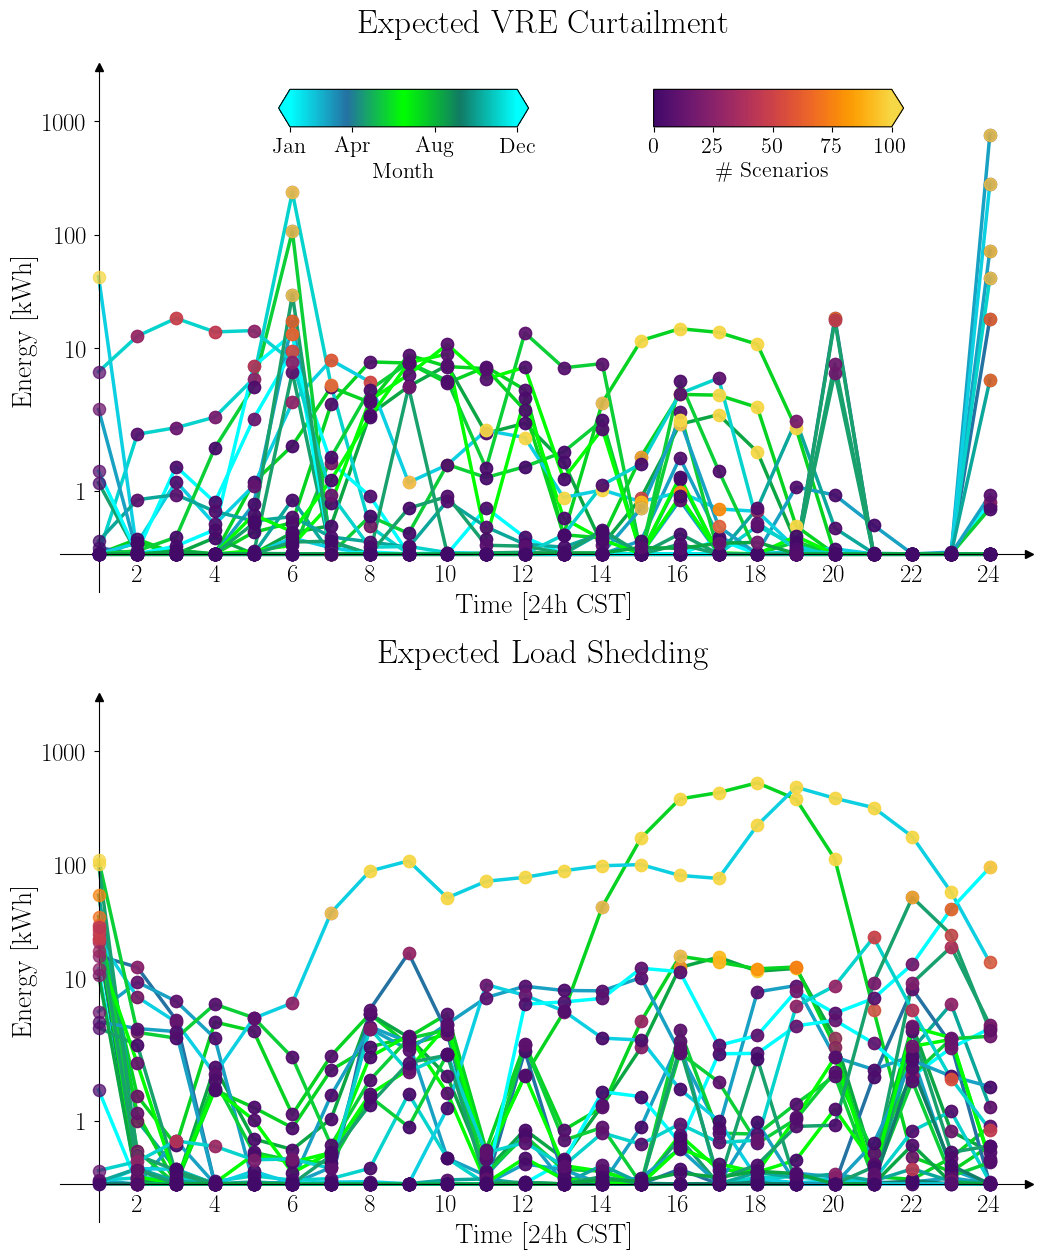

In [154]:
seassons_ = [0, 0, 2, 1, 1, 3, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 3, 3, 3, 3, 2, 2, 0]
#colors_   = [['#900C3F', '#DAF7A6', '#FF5733', '#FFC300'][seasson] for seasson in seassons_]

import matplotlib.colors


def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap =  matplotlib.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


vmin = 100
all_prob_vre_curtail_p_ = all_prob_vre_curtail_/vmin
x_ = np.arange(0, all_mean_vre_curtail_.shape[0], 1)
y_ = all_mean_vre_curtail_ + 1e-25

#plt.style.use('default')

fig = plt.figure(figsize = (12.5, 15))
ax1 = fig.add_subplot(211) 

#cmap1 = mpl.colormaps['inferno']
cmap1 = truncate_colormap(plt.get_cmap('inferno'), .2, .9)

#cmap2 = mpl.colormaps['winter']
#cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#2471A3', '#82E0AA', '#82E0AA', '#117A65', '#117A65', '#5DADE2', '#5DADE2', '#2471A3'])
#cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['cyan', '#5DADE2', '#2471A3', '#117A65', '#82E0AA', 'lime'])
#cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['cyan', '#5DADE2', '#82E0AA', 'lime'])
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", ['cyan', '#2471A3', 'lime', '#117A65', 'cyan'])

# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax1.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax1.spines[["top", "right"]].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax1.plot(1, 0, ">k", transform = ax1.get_yaxis_transform(), 
                     clip_on   = False)
ax1.plot(0, 1, "^k", transform = ax1.get_xaxis_transform(), 
                     clip_on   = False)

for j in range(all_mean_vre_curtail_.shape[1]):

    list_ = [cmap1(all_prob_vre_curtail_p_[i, j]) for i in range(all_mean_vre_curtail_.shape[0])]
    ax1.set_prop_cycle('color', list_)

    ax1.plot(x_, y_[:, j], linewidth  = 2.5, 
                           #color      = colors_[j],
                           color      = cmap2(month_[j]/12.),
                           marker     = '', 
                           linestyle  = '-', zorder = 0)

    for i in range(all_mean_vre_curtail_.shape[0]):
        ax1.plot(x_[i:i + 2], y_[i:i + 2, j], marker          = '.', 
                                              markersize      = 17.5, 
                                              linestyle       = '', 
                                              #markeredgecolor = 'k', 
                                              #markeredgewidth = .25, 
                                              alpha           = .75, 
                                              zorder          = 10)

ax1.set_ylim(-.6, 3000)
ax1.set_xlim(-1, 24)
ax1.set_xticks(np.arange(0, all_mean_vre_curtail_.shape[0], 1)[1::2], np.arange(1, all_mean_vre_curtail_.shape[0] + 1, 1)[1::2], fontsize = 18)
ax1.set_yscale('symlog')
ax1.set_yticks([1, 10, 100, 1000], [1, 10, 100, 1000], fontsize = 18)
ax1.set_xlabel('Time [24h CST]', fontsize = 20)
ax1.set_ylabel('Energy [kWh]', fontsize = 20)
ax1.set_title('Expected VRE Curtailment', fontsize = 24, y = 1.05)

# Load Shedding Stats graph
all_prob_load_shed_p_ = all_prob_load_shed_/vmin
x_ = np.arange(0, all_prob_load_shed_.shape[0], 1)
y_ = all_mean_load_shed_ + 1e-25
print(x_.shape, y_.shape)

ax2 = fig.add_subplot(212) 

# Move the left and bottom spines to x = 0 and y = 0, respectively.
ax2.spines[["left", "bottom"]].set_position(("data", 0))
# Hide the top and right spines.
ax2.spines[["top", "right"]].set_visible(False)

# Draw arrows (as black triangles: ">k"/"^k") at the end of the axes.  In each
# case, one of the coordinates (0) is a data coordinate (i.e., y = 0 or x = 0,
# respectively) and the other one (1) is an axes coordinate (i.e., at the very
# right/top of the axes).  Also, disable clipping (clip_on=False) as the marker
# actually spills out of the axes.
ax2.plot(1, 0, ">k", transform = ax2.get_yaxis_transform(), 
                     clip_on   = False)
ax2.plot(0, 1, "^k", transform = ax2.get_xaxis_transform(), 
                     clip_on   = False)

for j in range(all_mean_load_shed_.shape[1]):

    list_ = [cmap1(all_prob_load_shed_p_[i, j]) for i in range(all_mean_load_shed_.shape[0])]
    ax2.set_prop_cycle('color', list_)

    ax2.plot(x_, y_[:, j], linewidth  = 2.5, 
                           #color      = 'k',
                           color      = cmap2(month_[j]/12.),
                           marker     = '', 
                           linestyle  = '-', 
                           zorder     = 0)

    for i in range(all_mean_vre_curtail_.shape[0]): 
        ax2.plot(x_[i:i + 2], y_[i:i + 2, j], marker          = '.', 
                                              markersize      = 17.5, 
                                              linestyle       = '', 
                                              #markeredgecolor = 'k', 
                                              #markeredgewidth = .25, 
                                              alpha           = .75, 
                                              zorder          = 10)

cax = fig.add_axes([.6, .84, 0.2, .025])
#cax = fig.add_axes([.925, 0.55, 0.0125, .25])

cb = mpl.colorbar.ColorbarBase(cax, cmap        = cmap1, 
                                    #orientation = 'vertical',
                                    orientation = 'horizontal',
                                    norm        = mpl.colors.Normalize(0, vmin), 
                                    extend      = 'max',
                                    ticks       = [0., 25, 50, 75, 100])
cb.ax.tick_params(labelsize = 16)
cb.set_label(r'\# Scenarios', fontsize = 16)

cax = fig.add_axes([.3, .84, 0.2, .025])
#cax = fig.add_axes([.925, 0.2, 0.0125, .25])

cb = mpl.colorbar.ColorbarBase(cax, cmap        = cmap2, 
                                    #orientation = 'vertical',
                                    orientation = 'horizontal',
                                    norm        = mpl.colors.Normalize(1, 12), 
                                    label       = 'Month',
                                    extend      = 'both')

cb.set_ticks([1, 4, 8, 12])
cb.set_ticklabels(['Jan', 'Apr', 'Aug', 'Dec'], fontsize = 16)
cb.set_label(r'Month', fontsize = 16)

ax2.set_ylim(-.6, 3000)
ax2.set_xlim(-1, 24)
#ax1.set_xlim(0, all_mean_vre_curtail_.shape[0] - 1)
ax2.set_xticks(np.arange(0, all_mean_load_shed_.shape[0], 1)[1::2], np.arange(1, all_mean_load_shed_.shape[0] + 1, 1)[1::2], fontsize = 18)
ax2.set_yscale('symlog') 
ax2.set_yticks([1, 10, 100, 1000], [1, 10, 100, 1000], fontsize = 18)
ax2.set_xlabel('Time [24h CST]', fontsize = 20)
ax2.set_ylabel('Energy [kWh]', fontsize = 20)
ax2.set_title('Expected Load Shedding', fontsize = 24, y = 1.05)

plt.savefig(path_to_images + f"curtial_shedding_dist.pdf", dpi         = 300, 
                                                           bbox_inches = 'tight')
plt.show() 